In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import sys
import time as tm
import sklearn as sl
import matplotlib as mt
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display

#Here the necessary data is imported from csv format files and converted to data frames.
#Export quality and Export diversity data are sourced from the IMF 
#Population data is sourced from the world bank
#The desire of this project is to see if there is any direct linear correlation between the research scientists per capita in and the export diversity and average export quality.
#India and Canada are choosen as they represent a developing and developed country.

years = np.arange(1964, 2015, 1)

exdiv = pd.read_csv('ED_timeSeries.csv', dtype = object)
Ind_pop = pd.read_csv('API_IND_DS2_en_csv_v2_10515238.csv', header = 2, dtype = object)
expqual = pd.read_csv('EQ_timeseries_1.csv', header = 0, dtype = {'Country Name':object, 'Country Code':object, 'Indicator Name':object, 'Indicator Code':object, 'Product Name':object, 'Product Code':object, 'Attribute':object, '1963':np.float64, '1964':np.float64, '1965':np.float64, '1966':np.float64, '1967':np.float64, '1968':np.float64, '1969':np.float64, '1970':np.float64, '1971':np.float64, '1972':np.float64, '1973':np.float64, '1974':np.float64, '1975':np.float64, '1976':np.float64, '1977':np.float64, '1978':np.float64, '1979':np.float64, '1980':np.float64, '1981':np.float64, '1982':np.float64, '1983':np.float64, '1984':np.float64, '1985':np.float64, '1986':np.float64, '1987':np.float64, '1988':np.float64, '1989':np.float64, '1990':np.float64, '1991':np.float64, '1992':np.float64, '1993':np.float64, '1994':np.float64, '1995':np.float64, '1996':np.float64, '1997':np.float64, '1998':np.float64, '1999':np.float64, '2000':np.float64, '2001':np.float64, '2002':np.float64, '2003':np.float64, '2004':np.float64, '2005':np.float64, '2006':np.float64, '2007':np.float64, '2008':np.float64, '2009':np.float64, '2010':np.float64, '2011':np.float64, '2012':np.float64, '2013':np.float64, '2014':np.float64})
can_pop = pd.read_csv("API_CAN_DS2_en_csv_v2_10516745.csv", header = 2, dtype = object)






In [2]:
#The desired data is extracted from the larger data frames 

#eq_ar is mean export quality in different catagories of export div_ar is export diversity measured by the Theil index.
#sci_ar indicates scientists per million and pop_ar indicates total population
#ind indicates the country india while can indicates the country Canada.
can_eq_ar = expqual.loc[(expqual['Country Name'] == "Canada") & (expqual['Indicator Code'] =="qual_Mmean"), '1963':'2014']
can_div_ar = exdiv.loc[(exdiv['Country Name'] == "Canada") & (exdiv['Indicator Code'] =="total_theil"), '1963':'2014']
can_eq_tr = exdiv.loc[exdiv['Indicator Code'] == "qual_Mmean", '1980':'2008']
can_pop_ar = can_pop.loc[can_pop['Indicator Code'] == 'SP.POP.TOTL', '1963':'2014']
can_sci_ar = can_pop.loc[can_pop['Indicator Code'] == 'SP.POP.SCIE.RD.P6', '1963':'2014']
can_sci_pub_budg_ar = can_pop.loc[can_pop['Indicator Code'] == 'GB.XPD.RSDV.GD.ZS', '1963':'2014']
can_gdp_growth = can_pop.loc[can_pop['Indicator Code'] == 'NY.GDP.MKTP.KD.ZG', '1963':'2014']
can_med_pbudg = can_pop.loc[can_pop['Indicator Code'] == 'SH.XPD.CHEX.GD.ZS', '1963':'2014']
can_gdp_per_unit_energy = can_pop.loc[can_pop['Indicator Code'] == 'EG.GDP.PUSE.KO.PP', '1963':'2014']


ind_pop_ar = Ind_pop.loc[Ind_pop['Indicator Code'] == 'SP.POP.TOTL', '1963':'2014']
ind_sci_ar = Ind_pop.loc[Ind_pop['Indicator Code'] == 'SP.POP.SCIE.RD.P6', '1963':'2014']
ind_ed_budg = Ind_pop.loc[Ind_pop['Indicator Code'] == 'SE.XPD.CTOT.ZS', '1963':'2014']
ind_eq_ar = expqual.loc[(expqual['Country Name'] == "India") & (expqual['Indicator Code'] =="qual_Mmean"), '1963':'2014']
ind_sci_pub_budg_ar = Ind_pop.loc[Ind_pop['Indicator Code'] == 'GB.XPD.RSDV.GD.ZS', '1963':'2014']
ind_gdp_growth = Ind_pop.loc[Ind_pop['Indicator Code'] == 'NY.GDP.MKTP.KD.ZG', '1963':'2014']

In [3]:
#Take an average of export quality across all catagories and then transform it to include the year as a column not the index
can_eq_mean_ar = can_eq_ar.mean()
print(can_eq_mean_ar.shape)
can_eq_mean_df = pd.DataFrame(data = can_eq_mean_ar)
can_eq_mean_df.reset_index(level = 0, inplace = True)
can_eq_mean_df.columns = ['year', 'export quality']
#print(can_eq_mean_df.shape, list(can_eq_mean_df), can_eq_mean_df)
#print(can_eq_mean_df['export quality'])


(52,)


In [8]:
#Here the data is merged into a single table for Canada. NA values are dropped as the there is no issue of colinearity developing.

can_sci_trans = can_sci_ar.T
can_div_trans = can_div_ar.T
#print(can_sci_pub_budg_trans)

can_sci_trans.reset_index(level = 0, inplace = True)
can_div_trans.reset_index(level = 0, inplace = True)
can_sci_trans.columns = ['year', 'scientists']
can_div_trans.columns = ['year', 'export diversity']


#print(can_div_trans['year'])


#print(type(can_eq_mean_ar))
can_sci_trans['scientists'] = pd.to_numeric(can_sci_trans['scientists'])
can_sci_trans['year'] = pd.to_numeric(can_sci_trans['year'])
#print(can_sci_trans['year'])
can_sci_trans['scientists'] /= 1000000
#print(can_sci_trans)
#print(type(can_sci_trans['scientists']))
can_sci_trans = can_sci_trans.dropna()
#print(can_sci_trans)
can_eq_mean_df['year'] = pd.to_numeric(can_eq_mean_df['year'])
#print(can_eq_mean_df.shape, list(can_eq_mean_df), can_eq_mean_df['year'])
#print(type(can_eq_mean_df))
can_div_trans['year'] = pd.to_numeric(can_div_trans['year'])



can_sci_eq = can_sci_trans.join(can_eq_mean_df.set_index('year'), on = 'year', how = 'inner')
#print(can_sci_eq)
can_sci_eq_div = can_sci_eq.join(can_div_trans.set_index('year'), on = 'year', how = 'inner')
can_sci_eq_div['export diversity'] = pd.to_numeric(can_sci_eq_div['export diversity']) 

#print(can_sci_pub_budg_trans['public science budget'])
#can_sci_eq_div_budg = can_sci_eq_div.join(can_sci_pub_budg_trans.set_index('year'), on = 'year', how = 'inner')
 
print(can_sci_eq_div)





    year  scientists  export quality  export diversity
33  1996    0.003055        0.930952          1.905467
34  1997    0.003116        0.932860          1.893744
35  1998    0.003155        0.927083          1.894248
36  1999    0.003239        0.923890          1.995210
37  2000    0.003511        0.921045          2.043467
38  2001    0.003691        0.924902          2.035564
39  2002    0.003702        0.922362          2.035300
40  2003    0.003896        0.918684          2.062201
41  2004    0.004081        0.919000          2.032423
42  2005    0.004234        0.921167          2.058040
43  2006    0.004309        0.919756          2.034150
44  2007    0.004583        0.918239          2.016205
45  2008    0.004706        0.915289          2.096381
46  2009    0.004446        0.916306          1.976951
47  2010    0.004643        0.915274          2.169204
48  2011    0.004780        0.920132          2.216772
49  2012    0.004630        0.920868          2.280877
50  2013  

In [9]:
can_sci_pub_budg_trans = can_sci_pub_budg_ar.T
#print(can_sci_pub_budg_trans)
can_sci_pub_budg = can_sci_pub_budg_trans.reset_index(level = 0, inplace = True)
can_sci_pub_budg_trans.columns = ['year', 'public research budget']
can_sci_pub_budg_trans['public research budget'] = pd.to_numeric(can_sci_pub_budg_trans['public research budget'])
can_sci_pub_budg_trans['year'] = pd.to_numeric(can_sci_pub_budg_trans['year'])
#print(can_sci_pub_budg_trans.shape)

can_med_pbudg_trans = can_med_pbudg.T
#print(can_ed_budg_trans)
can_med_pbudg_trans.reset_index(level = 0, inplace = True)
#print(can_ed_budg_trans)
can_med_pbudg_trans.columns = ['year', 'public health expenditure']
can_med_pbudg_trans['public health expenditure'] = pd.to_numeric(can_med_pbudg_trans['public health expenditure'])
can_med_pbudg_trans['year'] = pd.to_numeric(can_med_pbudg_trans['year'])
#print(can_sci_pub_budg_trans.shape)

can_gdp_growth_trans = can_gdp_growth.T
can_gdp_growth_trans.reset_index(level = 0, inplace = True)
can_gdp_growth_trans.columns = ['year', 'gdp growth']
can_gdp_growth_trans['gdp growth'] = pd.to_numeric(can_gdp_growth_trans['gdp growth'])
can_gdp_growth_trans['year'] = pd.to_numeric(can_gdp_growth_trans['year'])
#print(can_gdp_growth_trans)

can_sci_med_pbudg = can_med_pbudg_trans.join(can_sci_pub_budg_trans.set_index('year'), on = 'year', how = 'inner')
#print(can_sci_pbudg)
can_sci_med_pbudg_gdpg = can_sci_med_pbudg.join(can_gdp_growth_trans.set_index('year'), on = 'year', how = 'inner')
can_sci_med_pbudg_gdpg['public research budget'] /= 100
can_sci_med_pbudg_gdpg['public health expenditure'] /= 100
can_sci_med_pbudg_gdpg['gdp growth'] /= 100

can_sci_med_pbudg_gdpg = can_sci_med_pbudg_gdpg.dropna()
print(can_sci_med_pbudg_gdpg)
#can_sci_ed_pbudg_gdpg_con = can_sci_ed_pbudg_gdpg.loc[(can_sci_ed_pbudg_gdpg['year'] >= 1998) & (can_sci_ed_pbudg_gdpg['year'] <= 2011)]
#print(can_sci_ed_pbudg_gdpg_con)

    year  public health expenditure  public research budget  gdp growth
37  2000                   0.082757                0.018647    0.051827
38  2001                   0.086553                0.020283    0.017708
39  2002                   0.088882                0.019787    0.030100
40  2003                   0.090428                0.019748    0.018023
41  2004                   0.090972                0.020042    0.030860
42  2005                   0.090644                0.019776    0.032014
43  2006                   0.092071                0.019487    0.026234
44  2007                   0.092984                0.019086    0.020627
45  2008                   0.094651                0.018604    0.010004
46  2009                   0.105741                0.019223   -0.029496
47  2010                   0.105622                0.018296    0.030835
48  2011                   0.102197                0.017913    0.031412
49  2012                   0.102229                0.017766    0

In [7]:
ind_sci_trans = ind_sci_ar.T
ind_sci_trans.reset_index(level = 0, inplace = True)
ind_sci_trans.columns = ['year', 'ind scientists']
ind_sci_trans['year'] = pd.to_numeric(ind_sci_trans['year'])
ind_sci_trans['ind scientists'] = pd.to_numeric(ind_sci_trans['ind scientists'])
#print(ind_sci_trans)
ind_pub_budg_trans = ind_sci_pub_budg_ar.T
#print(ind_sci_pub_budg_trans)
ind_pub_budg_trans.reset_index(level = 0, inplace = True)
#ind_sci_pub_budg_trans.drop('index')

ind_pub_budg_trans.columns = ['year', 'ind public science budget']
#print(ind_pub_budg_trans)
ind_pub_budg_trans['ind public science budget'] = pd.to_numeric(ind_pub_budg_trans['ind public science budget'])
ind_pub_budg_trans['year'] = pd.to_numeric(ind_pub_budg_trans['year'])
#print(can_sci_pub_budg_trans.shape)

ind_gdp_growth_trans = ind_gdp_growth.T
ind_gdp_growth_trans.reset_index(level = 0, inplace = True)
ind_gdp_growth_trans.columns = ['year', 'ind gdp growth']
ind_gdp_growth_trans['ind gdp growth'] = pd.to_numeric(ind_gdp_growth_trans['ind gdp growth'])
ind_gdp_growth_trans['year'] = pd.to_numeric(ind_gdp_growth_trans['year'])
#print(can_gdp_growth_trans)

ind_sci_pbudg = ind_sci_trans.join(ind_pub_budg_trans.set_index('year'), on = 'year', how = 'inner')
#print(can_sci_pbudg)
ind_sci_pbudg_gdpg = ind_sci_pbudg.join(ind_gdp_growth_trans.set_index('year'), on = 'year', how = 'inner')
ind_sci_pbudg_gdpg = ind_sci_pbudg_gdpg.dropna()
ind_sci_pbudg_gdpg['ind scientists'] /= 1000000
ind_sci_pbudg_gdpg['ind public science budget'] /= 100
ind_sci_pbudg_gdpg['ind gdp growth'] /= 100
print(ind_sci_pbudg_gdpg)

    year  ind scientists  ind public science budget  ind gdp growth
33  1996        0.000153                   0.006477        0.075495
35  1998        0.000116                   0.007133        0.061844
37  2000        0.000110                   0.007672        0.038410
42  2005        0.000135                   0.008358        0.092848
47  2010        0.000157                   0.008221        0.102600


In [6]:
#check for linear relation between per capita researchers and export quality.
slope, intercept, r_value, p_value, std_err = stats.linregress(can_sci_eq_div.iloc[:,1], can_sci_eq_div.iloc[:,2])
print("Canada scientists v export quality", slope, intercept, r_value, p_value, std_err)

Canada scientists v export quality -6.857312869321385 0.9489589445646229 -0.8465779056110048 4.8773886976410016e-06 1.045659639324713


In [7]:
#The same is done for per capita scientists and export diversity. 
slope, intercept, r_value, p_value, std_err = stats.linregress(can_sci_eq_div.iloc[:,1], can_sci_eq_div.iloc[:,3])
print("Canada scientists v total theil index", slope, intercept, r_value, p_value, std_err)

Canada scientists v total theil index 158.00558012031928 1.430152183202968 0.7583983881517031 0.00016775022368275964 32.93510974562792


In [ ]:
#In both cases a good r_values but poor correlation coefficient is found suggesting that neither export diversity nor
#average export quality directly depend on linearly on the number of scientists.

In [10]:
#Here we will use sci kit learn to test the same hypothesis and possibly another kind of regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#print(can_pop_ar.T.shape, np.reshape(np.asarray(can_eq_mean_ar), (52, 1)).shape)
#d = can_sci_eq_div.iloc[:,0]
di = np.linspace(can_sci_eq_div['scientists'].min(), can_sci_eq_div['scientists'].max(), 19).reshape(-1, 1)

#print(di)

#sci_cans = pd.series(can_sci_eq_div.iloc[:,1])
#eq_cans = can_sci_eq_div.iloc[:,2]

#sci_cans_2 = sci_cans.reshape(1,-1)
#eq_cans_2 = eq_cans.reshape(1,-1)

regr = linear_model.LinearRegression()
can_eq_trunc  = can_eq_mean_ar.tail(len(can_sci_trans))
#print(can_div_t_trunc)
#print(len(can_sci_trans), can_eq_trunc.shape, can_eq_trunc)
regr.fit(can_sci_trans, can_eq_trunc)
#regr.fit(can_sci_eq_div.iloc[:,1], can_sci_eq_div.iloc[:,2])

#eq_pred = regr.predict(np.asarray(can__ar)[0].reshape(-1,1))



#print(regr.score(can_sci_eq_div.iloc[:,1], can_sci_eq_div.iloc[:,2]), regr.coef_, regr.intercept_)
print(regr.score(can_sci_trans, can_eq_trunc), regr.coef_, regr.intercept_)


0.7169248616757464 [ 4.18448482e-05 -7.22414260e+00] 0.8665458403973401


In [11]:
#Here we will use sci kit learn to test the same hypothesis and possibly another kind of regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#print(can_pop_ar.T.shape, np.reshape(np.asarray(can_eq_mean_ar), (52, 1)).shape)
di = np.linspace(can_sci_eq_div['scientists'].min(), can_sci_eq_div['scientists'].max(), 19).reshape(-1, 1)

#print(di)


#print(can_sci_trans.shape, can_div_trans.tail(19))

#sci_dat = np.reshape(can_sci_eq_div.iloc[:,1], (19,1))

#print(can_sci_eq_div.iloc[:,1].shape)

regr = linear_model.LinearRegression()
can_div_t_trunc = can_div_trans.tail(len(can_sci_trans))
can_eq_trunc  = can_eq_mean_ar.tail(len(can_sci_trans))
#print(can_div_t_trunc)
print(len(can_sci_trans), len(can_div_t_trunc['export diversity']))
regr.fit(can_sci_trans, can_div_t_trunc['export diversity'])



print(regr.score(can_sci_trans, can_div_t_trunc['export diversity']), regr.coef_, regr.intercept_)

19 19
0.8141559404430014 [ 3.46404352e-02 -1.45667200e+02] -66.7939164770472


In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



regr = linear_model.LinearRegression()

regr.fit(can_sci_med_pbudg_gdpg[['public health expenditure', 'public research budget']], can_sci_med_pbudg_gdpg['gdp growth'])




print(regr.score(can_sci_med_pbudg_gdpg[['public health expenditure', 'public research budget']], can_sci_med_pbudg_gdpg['gdp growth']), regr.coef_, regr.intercept_)


0.50090226220888 [ -2.19402301 -11.58426643] 0.44997181166790473


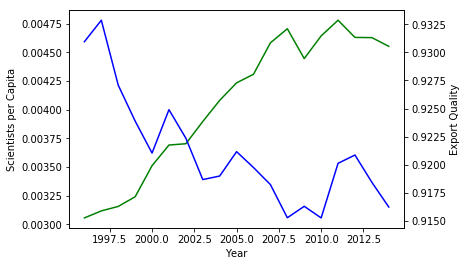

In [20]:
#Plot scientists per capita and mean export quality against time. Note the Y axes are different scales. 
import matplotlib.pyplot as plt
x = range(1995, 2015)
y1 = np.linspace(0, .004, 40)
y2 = np.linspace(0.00, 4.0, 200)
fig, ax1 = plt.subplots() 

ax2 = ax1.twinx()
ax1.plot(can_sci_eq_div.iloc[:,0], can_sci_eq_div.iloc[:,1], 'g-', label= 'scientists')
ax2.plot(can_sci_eq_div.iloc[:,0], can_sci_eq_div.iloc[:,2], 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Scientists per Capita')
ax2.set_ylabel('Export Quality')

plt.show()

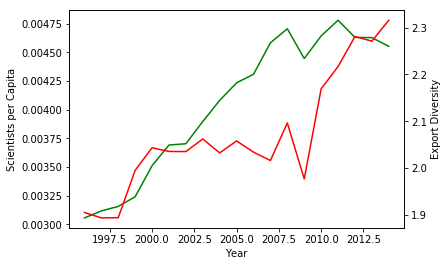

In [18]:
#Here the scientists per capita and Total Theil index are plotted against time. Again with different scale Y axes.
import matplotlib.pyplot as plt
x = range(1995, 2015)
y1 = np.linspace(0, .004, 40)
y2 = np.linspace(0.00, 4.0, 200)
fig, ax1 = plt.subplots() 

ax2 = ax1.twinx()


ax1.plot(can_sci_eq_div.iloc[:,0], can_sci_eq_div.iloc[:,1], 'g-')
ax2.plot(can_sci_eq_div.iloc[:,0], can_sci_eq_div.iloc[:,3], 'r-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Scientists per Capita')
ax2.set_ylabel('Export Diversity')


plt.show()

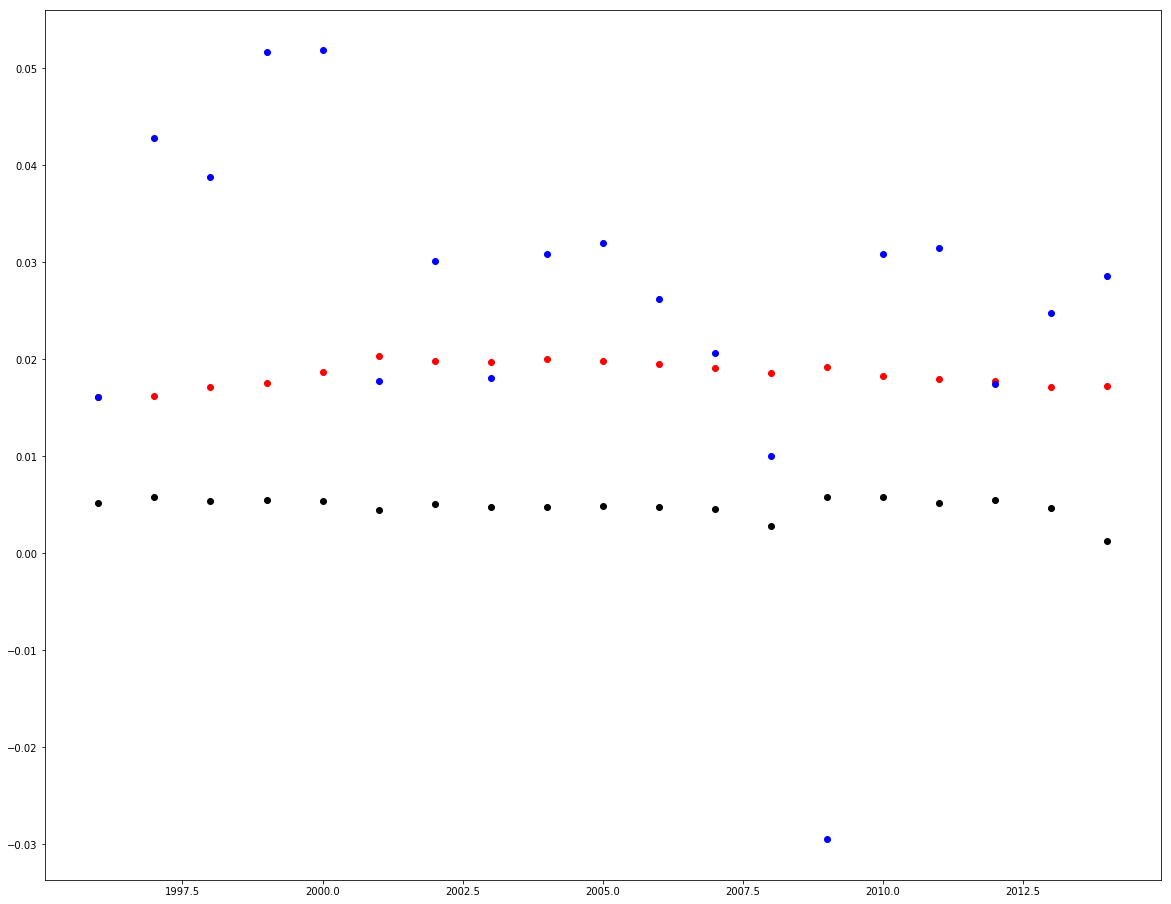

In [15]:
plt.figure(figsize = (20, 16))
plt.scatter(np.asarray(can_sci_inf_pbudg_gdpg.iloc[:,0]), can_sci_inf_pbudg_gdpg.iloc[:,1],  color='black')
plt.scatter(np.asarray(can_sci_inf_pbudg_gdpg.iloc[:,0]), can_sci_inf_pbudg_gdpg.iloc[:,2],  color='red')
plt.scatter(np.asarray(can_sci_inf_pbudg_gdpg.iloc[:,0]), can_sci_inf_pbudg_gdpg.iloc[:,3],  color='blue')


plt.show()